<a href="https://colab.research.google.com/github/sultansaukahibrahim/Clustering-Data-Mining/blob/main/Copy_of_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
importir rt pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
file_path = 'shopping_behavior_updated.csv'
data = pd.read_csv(file_path)
data.head()
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [ ]:
# Data Preprocessing
data.drop('Customer ID', axis=1, inplace=True)

# There is no missing data

# Label Encoding for binary columns
le = LabelEncoder()
binary_columns = ['Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used']
for col in binary_columns:
    data[col] = le.fit_transform(data[col])

numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
categorical_columns = ['Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season',
                       'Shipping Type', 'Payment Method', 'Frequency of Purchases']

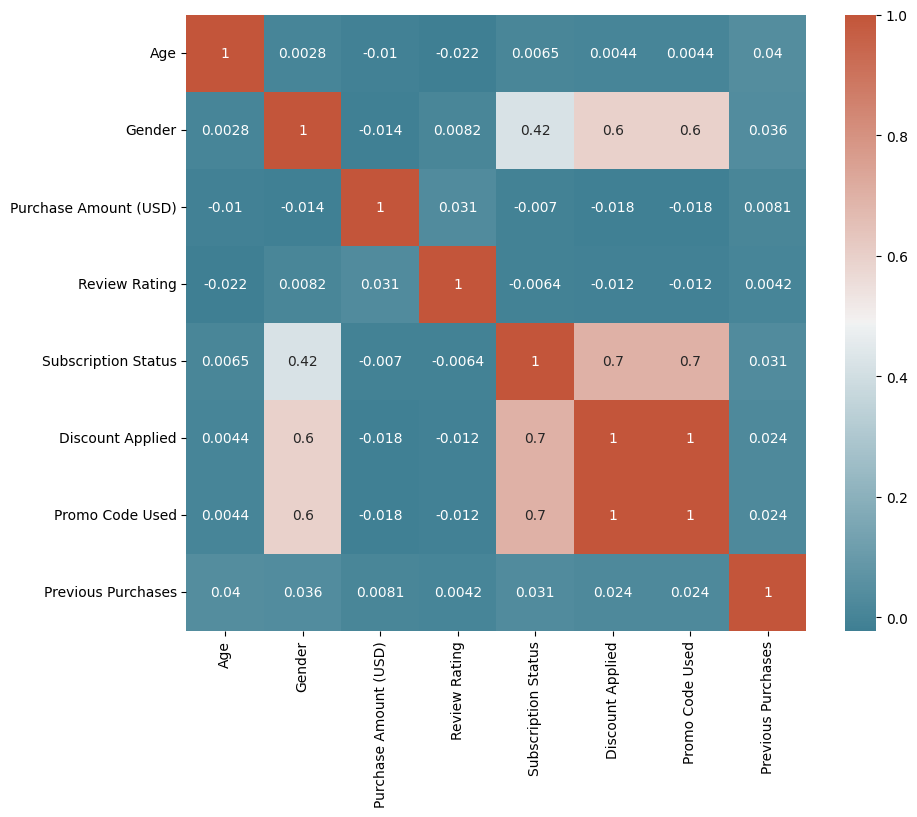

In [ ]:
corr = data.loc[:, ~data.columns.isin(categorical_columns)].corr() #exclude categorical_columns

plt.subplots(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [ ]:
# One-Hot Encoding for non-binary categorical columns
data = pd.get_dummies(data, columns=categorical_columns)

In [ ]:
# Standard Scaler for numerical columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
# Display the first few rows of the preprocessed dataset
data

,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Item Purchased_Backpack,Item Purchased_Belt,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.718913,1,-0.285629,-0.907584,1,1,1,-0.785831,False,False,...,False,False,True,False,False,False,True,False,False,False
1,-1.648629,1,0.178852,-0.907584,1,1,1,-1.616552,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.390088,1,0.558882,-0.907584,1,1,1,-0.162789,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-1.517099,1,1.276716,-0.349027,1,1,1,1.637107,False,False,...,False,True,False,False,False,False,False,False,False,True
4,0.061263,1,-0.454531,-1.466141,1,1,1,0.391025,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,-0.267563,0,-1.341267,0.628448,0,0,0,0.460252,False,False,...,False,False,True,False,False,False,False,False,False,True
3896,0.521618,0,-0.454531,1.047366,0,0,0,1.083293,True,False,...,False,False,False,False,True,False,False,False,False,False
3897,0.127028,0,-1.130139,-1.186862,0,0,0,-0.093563,False,True,...,False,False,True,False,False,False,False,False,True,False
3898,-0.004502,0,0.727784,0.069891,0,0,0,-0.093563,False,False,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
# Export the DataFrame to a CSV file
data.to_csv("shopping_behavior_updated1.csv", index=False)

In [ ]:
# Load the dataset
file_path = 'shopping_behavior_updated1.csv'
data = pd.read_csv(file_path)

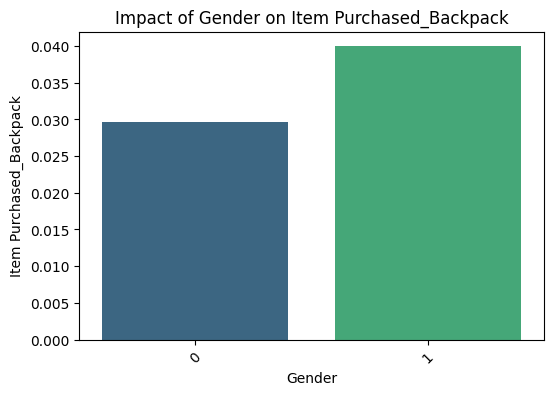

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Item Purchased_Backpack', data=data, ci=None, palette='viridis')
plt.title("Impact of Gender on Item Purchased_Backpack")
plt.xticks(rotation=45)
plt.show()

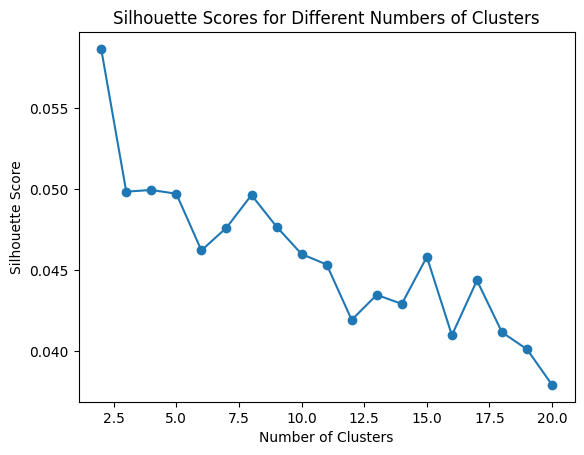

In [ ]:
from sklearn.metrics import silhouette_score

def calculate_silhouette_scores(data, range_clusters):
    silhouette_scores = [] # List to store silhouette scores for different cluster numbers
    for cluster in range_clusters:
        kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init=10)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

range_clusters = range(2, 21) # Silhouette score requires at least 2 clusters
silhouette_scores = calculate_silhouette_scores(data, range_clusters)

# Plotting the silhouette scores
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Optimal Number of Clusters: 2


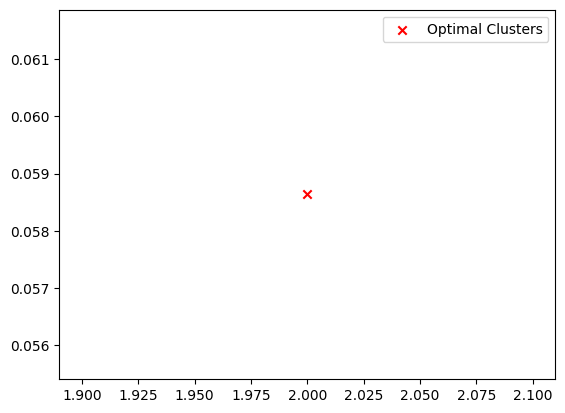

In [ ]:
# Find the optimal number of clusters
optimal_clusters = range_clusters[np.argmax(silhouette_scores)]
print("Optimal Number of Clusters:", optimal_clusters)

# Highlight the optimal point on the plot
plt.scatter(optimal_clusters, max(silhouette_scores), color='red', marker='x', label='Optimal Clusters')
plt.legend()
plt.show()

In [ ]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Train K-Means on the PCA-transformed data
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(data_pca)
kmeans

KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

5364.563426313159

In [ ]:
kmeans.cluster_centers_

array([[ 0.63066199,  0.56041183],
       [-0.62872447, -0.55869013]])

In [ ]:
kmeans.n_iter_

8

In [ ]:
kmeans_silhouette = silhouette_score(data, kmeans.labels_).round(2)
print(f"Silhouette Score: {kmeans_silhouette}")

Silhouette Score: 0.05


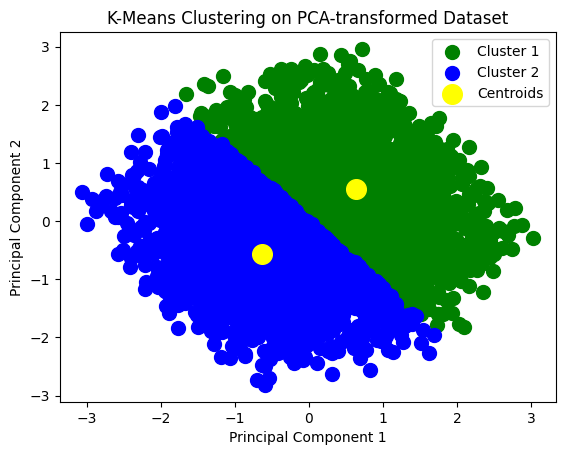

In [ ]:
# Visualize the clusters
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s=100, c='green', label='Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')

# Plot the centroids in the PCA space
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, c='yellow', label='Centroids')

# Finalize the plot
plt.title('K-Means Clustering on PCA-transformed Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

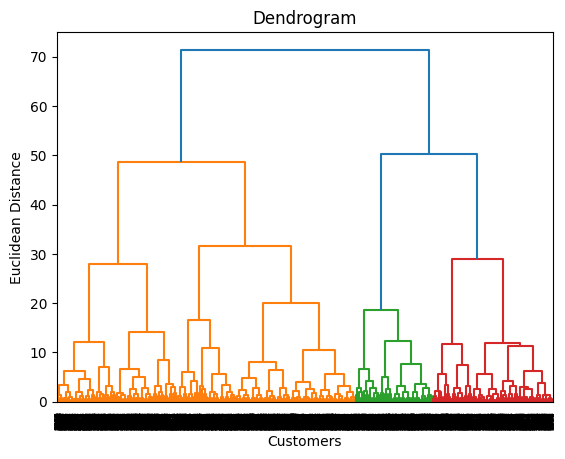

In [ ]:
import scipy.cluster.hierarchy as sch
# Create the dendrogram using the Ward's method on the PCA-transformed data
dendrogram = sch.dendrogram(sch.linkage(data_pca, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage="ward")

In [ ]:
y_hc = cluster.fit_predict(data_pca)

In [ ]:
silhouette_avg = silhouette_score(data_pca, y_hc)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.30703109551693974


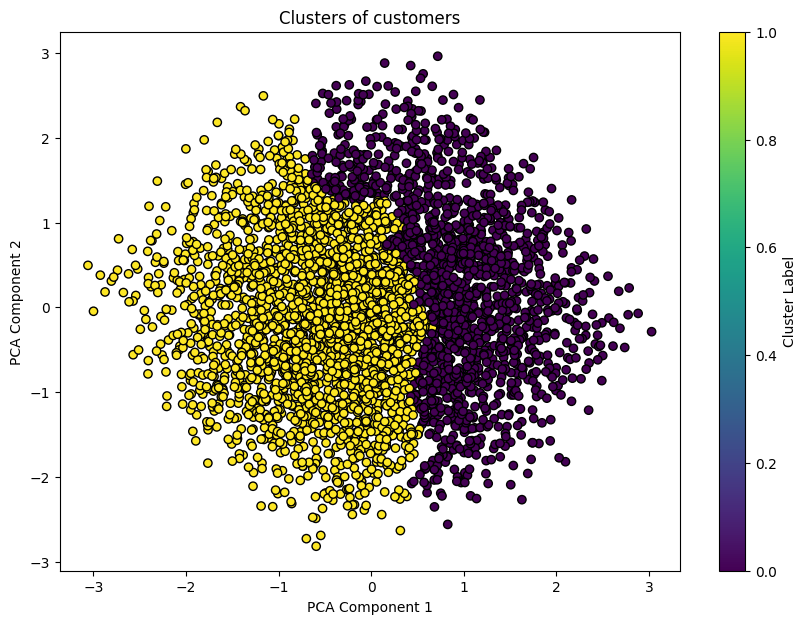

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_hc, cmap='viridis', edgecolors='k')
plt.title('Clusters of customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
# Undo Standard Scaling for numerical columns
data_undo = data.copy()
data_undo[numerical_columns] = scaler.inverse_transform(data_undo[numerical_columns])

# 1. Add cluster labels to the original data_undo
data_undo['Cluster'] = y_kmeans

In [ ]:
# 2. Explore cluster statistics
cluster_statistics = data_undo.groupby('Cluster').mean()
print("Cluster Statistics:")
for i in cluster_statistics.columns:
    print(cluster_statistics[i])

Cluster Statistics:
Cluster
0    52.102051
1    36.034872
Name: Age, dtype: float64
Cluster
0    0.702564
1    0.657436
Name: Gender, dtype: float64
Cluster
0    61.421026
1    58.107692
Name: Purchase Amount (USD), dtype: float64
Cluster
0    3.731026
1    3.768872
Name: Review Rating, dtype: float64
Cluster
0    0.292821
1    0.247179
Name: Subscription Status, dtype: float64
Cluster
0    0.451795
1    0.408205
Name: Discount Applied, dtype: float64
Cluster
0    0.451795
1    0.408205
Name: Promo Code Used, dtype: float64
Cluster
0    34.745641
1    15.957436
Name: Previous Purchases, dtype: float64
Cluster
0    0.034359
1    0.038974
Name: Item Purchased_Backpack, dtype: float64
Cluster
0    0.038462
1    0.044103
Name: Item Purchased_Belt, dtype: float64
Cluster
0    0.047179
1    0.040513
Name: Item Purchased_Blouse, dtype: float64
Cluster
0    0.039487
1    0.034359
Name: Item Purchased_Boots, dtype: float64
Cluster
0    0.042051
1    0.040513
Name: Item Purchased_Coat, dtype: fl

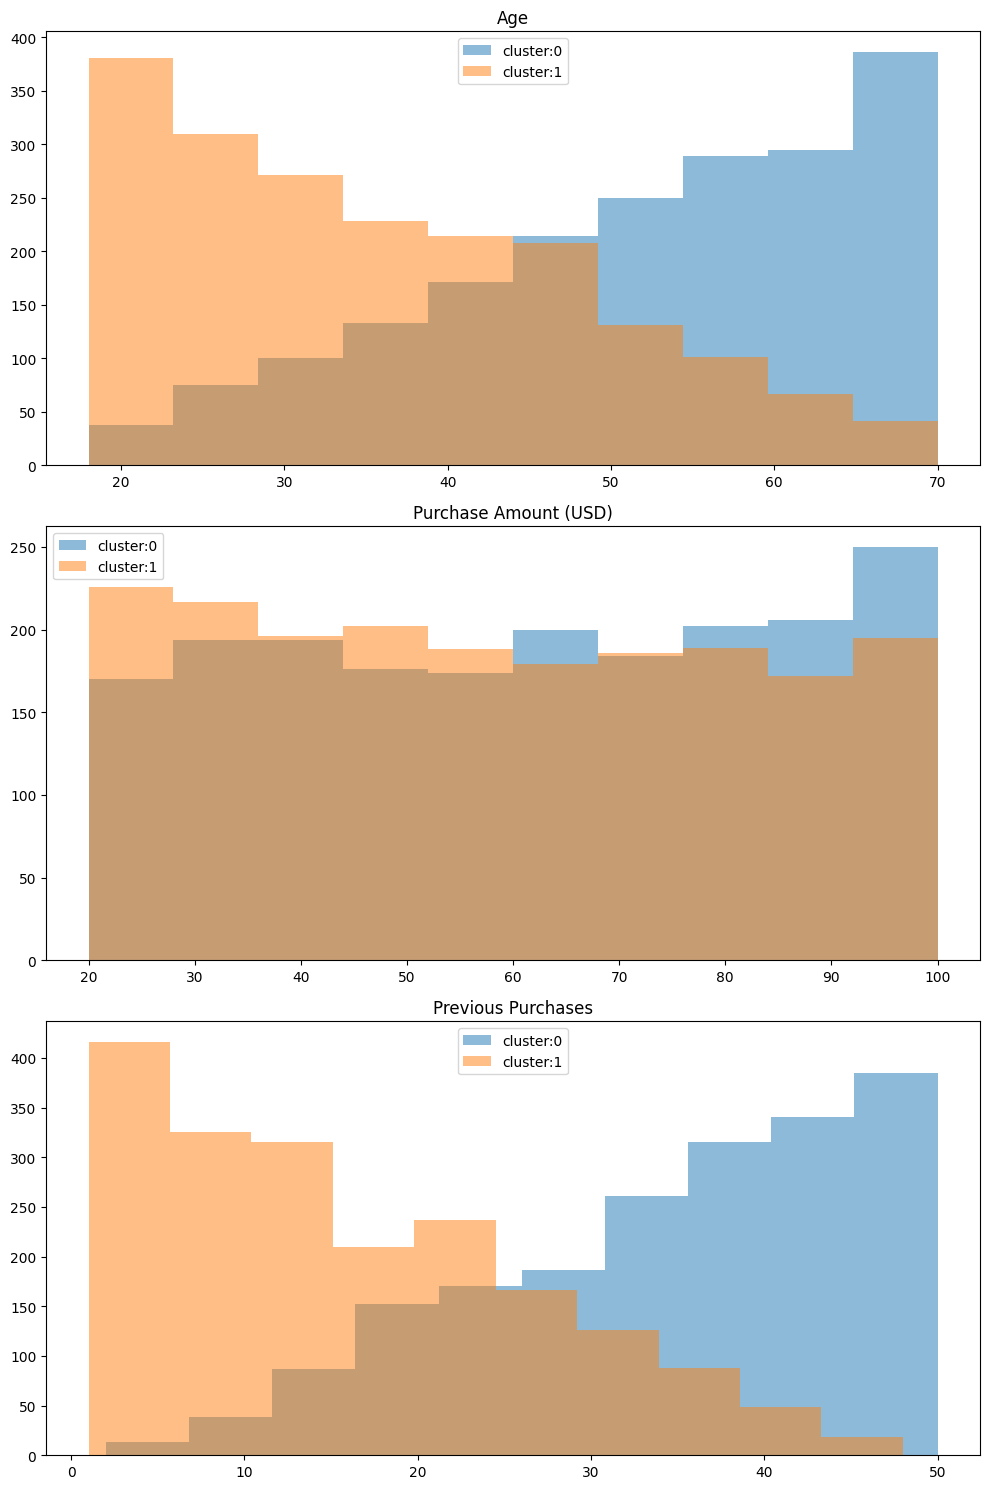

In [ ]:
# 3. Visualize original features by cluster
plt.figure(figsize=(10, 15))

columns_to_visualize = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']

for i, col_name in enumerate(columns_to_visualize):
    plt.subplot(len(columns_to_visualize), 1, i+1)
    for cluster in range(2):
        feature_data = data_undo.loc[data_undo['Cluster'] == cluster, col_name]
        plt.hist(feature_data, alpha=0.5, label=f'cluster:{cluster}')
    plt.title(col_name, fontsize=12)
    plt.legend()

plt.tight_layout()
plt.show()

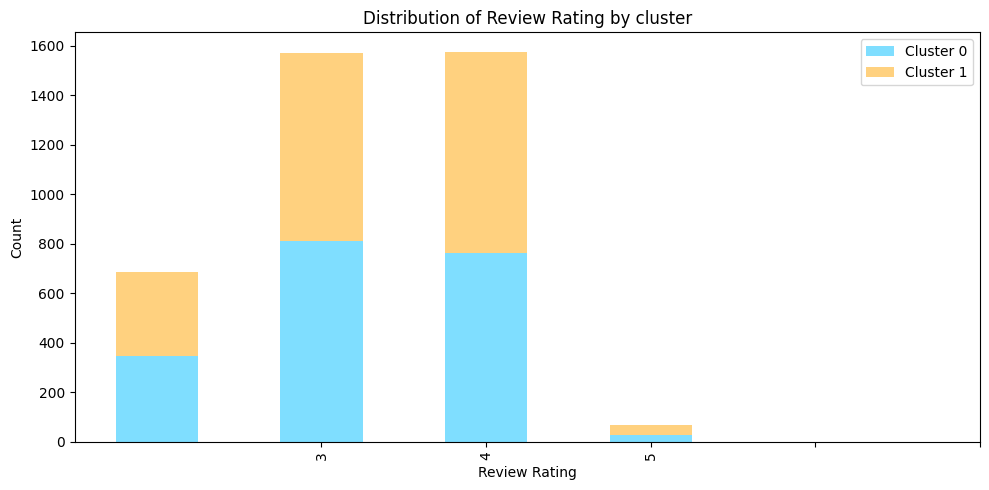

In [ ]:
data_undo['Review Rating'] = data_undo['Review Rating'].astype(int)  # Ensure that the ratings column is of integer type

# Create a pivot table to count the number of occurrences of each rating value in each cluster
pivot_table = pd.crosstab(data_undo['Cluster'], data_undo['Review Rating'], margins=False)

# Create a stacked bar chart
plt.figure(figsize=(10, 5))
cluster_0 = pivot_table.iloc[0]
cluster_1 = pivot_table.iloc[1]
cluster_0.plot(kind='bar', alpha=0.5, color='deepskyblue', label='Cluster 0')
cluster_1.plot(kind='bar', alpha=0.5, color='orange', label='Cluster 1', bottom=cluster_0)

# Add a legend and a title
plt.legend()
plt.title('Distribution of Review Rating by cluster')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(np.arange(1, 6))

plt.tight_layout()
plt.show()

In [ ]:
# Get a list of binary columns (except column 'Cluster')
binary_cols = [col for col in data_undo.columns if data_undo[col].nunique() == 2 and col != 'Cluster']

# Calculate statistics for each binary column for cluster 0 and cluster 1
for col in binary_cols:
    clust0 = data_undo.loc[data_undo['Cluster'] == 0, col]
    clust1 = data_undo.loc[data_undo['Cluster'] == 1, col]
    print()
    print(f"# '{col}' Statistics:")
    print(f"Cluster 0:")
    print(f"  Mean: {clust0.mean():.4f}")
    print(f"  Median: {clust0.median():.4f}")
    print(f"  Standard Deviation: {clust0.std():.4f}")
    print(f"  Percentage of True values: {clust0.mean()*100:.1f}%")
    print(f"Cluster 1:")
    print(f"  Mean: {clust1.mean():.4f}")
    print(f"  Median: {clust1.median():.4f}")
    print(f"  Standard Deviation: {clust1.std():.4f}")
    print(f"  Percentage of True values: {clust1.mean()*100:.1f}%")


# 'Gender' Statistics:
Cluster 0:
  Mean: 0.7026
  Median: 1.0000
  Standard Deviation: 0.4572
  Percentage of True values: 70.3%
Cluster 1:
  Mean: 0.6574
  Median: 1.0000
  Standard Deviation: 0.4747
  Percentage of True values: 65.7%

# 'Subscription Status' Statistics:
Cluster 0:
  Mean: 0.2928
  Median: 0.0000
  Standard Deviation: 0.4552
  Percentage of True values: 29.3%
Cluster 1:
  Mean: 0.2472
  Median: 0.0000
  Standard Deviation: 0.4315
  Percentage of True values: 24.7%

# 'Discount Applied' Statistics:
Cluster 0:
  Mean: 0.4518
  Median: 0.0000
  Standard Deviation: 0.4978
  Percentage of True values: 45.2%
Cluster 1:
  Mean: 0.4082
  Median: 0.0000
  Standard Deviation: 0.4916
  Percentage of True values: 40.8%

# 'Promo Code Used' Statistics:
Cluster 0:
  Mean: 0.4518
  Median: 0.0000
  Standard Deviation: 0.4978
  Percentage of True values: 45.2%
Cluster 1:
  Mean: 0.4082
  Median: 0.0000
  Standard Deviation: 0.4916
  Percentage of True values: 40.8%

# 'Item Purchas